Exercise 1

Using tensorflow, construct and train a network consisting of fully connected layers for classification of MNIST dataset.
 Construct and train a fully connected autoencoder. Be able to explain details of your implementation and justify the decisions made.

Fully connected Mnist classifier

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Flatten , Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy , MeanSquaredError
from keras.utils import to_categorical
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


According to doc we should have 60000 examples in training and 10000 examples in testing dataset

In [3]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
# fully connected neural network model 

model = Sequential([
    Flatten(),  # shoud be 28*28 , vector of length 784,
    Dense(units = 128 , use_bias = True, activation = 'relu'),
    Dense(units = 64 , use_bias = True, activation = 'relu'),
    Dense(units = 10 , activation = 'softmax')   # as we have 10 numbers to classify so we want to get same number of classes in the end 
     
])


In [5]:
# prepare optimizer as proposed using Adam 
model.compile(optimizer= Adam(learning_rate=0.001), # defalt lr 
              loss = CategoricalCrossentropy(from_logits= False), # as we have output from final layer in probabability like values 
              metrics = ['accuracy'] 
              )

In [6]:
# 1-hot encoding for target 
train_labels_oh = to_categorical(Y_train,num_classes=10) # one hot encoding 3 type of flowers  # full set 
test_labels_oh = to_categorical(Y_test,num_classes=10)


In [7]:
model.fit(X_train,train_labels_oh, epochs=10 , batch_size= None)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 658us/step - accuracy: 0.7010 - loss: 4.4633
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9068 - loss: 0.3595
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.9428 - loss: 0.2171
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9555 - loss: 0.1653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.9628 - loss: 0.1387
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9676 - loss: 0.1221
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.9716 - loss: 0.1064
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.9753 - loss: 0.0947
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9769 - loss: 0.0899
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9796 - loss: 0.0762


In [8]:
test_loss, test_accuracy = model.evaluate(X_test, test_labels_oh)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.9617 - loss: 0.1863
Test Loss: 0.1700
Test Accuracy: 0.9658


In [11]:
test_prediction = np.argmax(model.predict(X_test),axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


In [12]:
indexes_with_error = []
for i in range(len(test_prediction)):
    if test_prediction.item(i) != Y_test.item(i):
        indexes_with_error.append(i)

In [13]:
len(indexes_with_error)

342

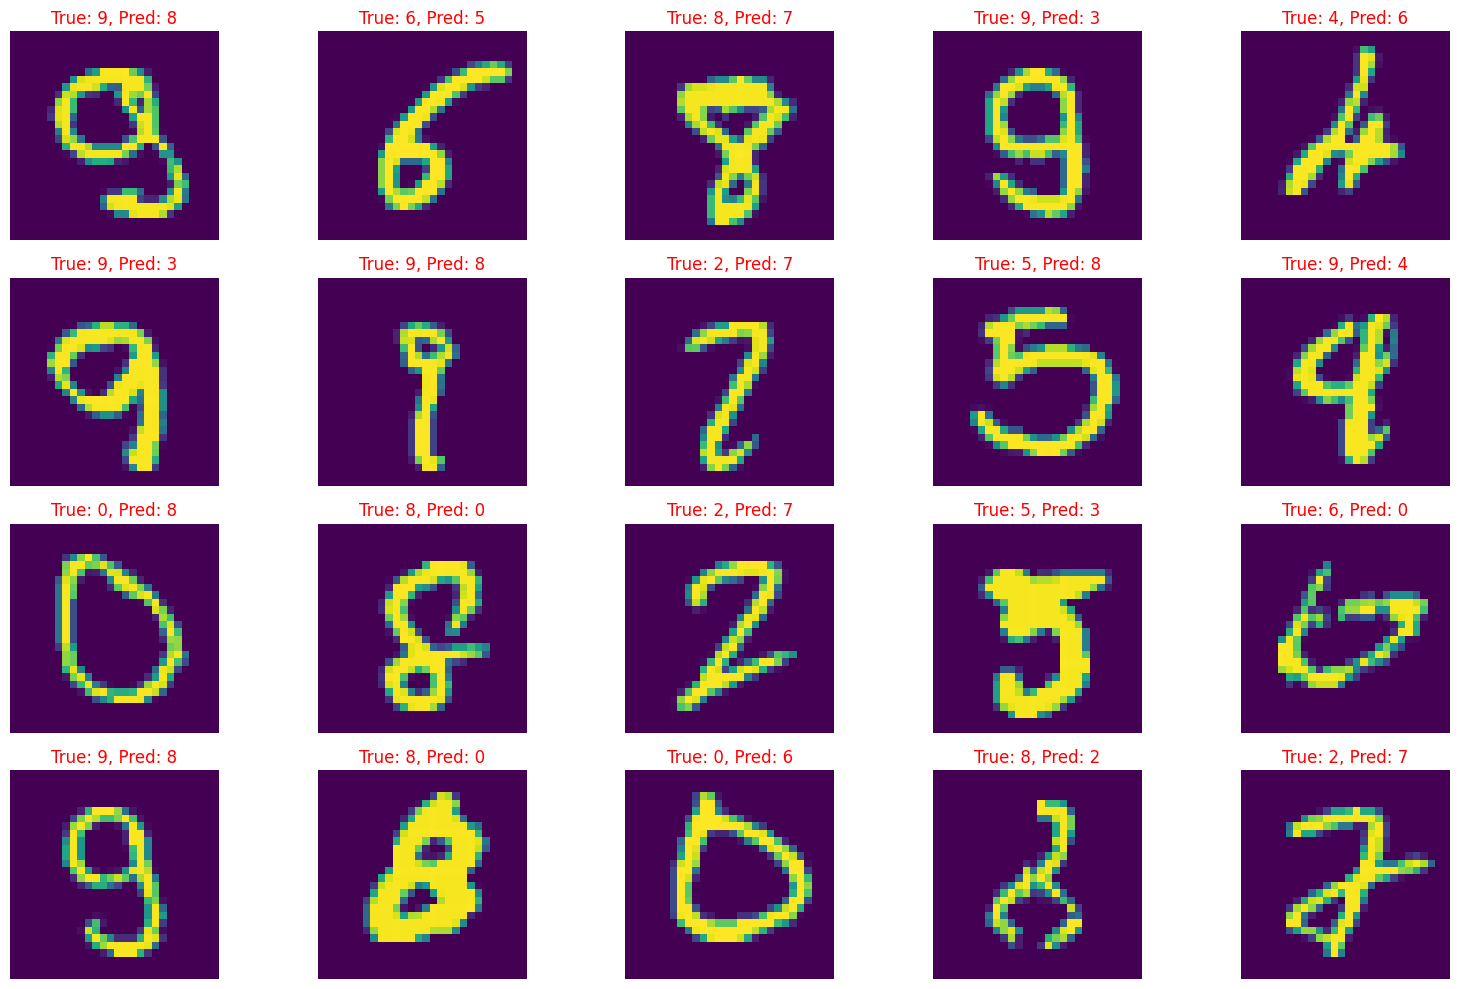

In [14]:
# Function to plot mistakes
import matplotlib.pyplot as plt
def plot_mistakes(mistake_indexes, x_test, y_test, predicted_labels, num_images=10):
    """
    Visualize mistakes made by the model.
    Args:
        mistake_indexes (list): Indexes of mistakes.
        x_test (numpy array): Test images.
        y_test (numpy array): True labels.
        predicted_labels (numpy array): Predicted labels.
        num_images (int): Number of mistakes to visualize.
    """
    plt.figure(figsize=(16, 10))
    for i, idx in enumerate(mistake_indexes[:num_images]):
        plt.subplot(4, 5, i + 1)
        # Reshape image if needed (depending on dataset format)
        image = x_test[idx]
        plt.imshow(image)
        true_label = y_test[idx]
        pred_label = predicted_labels[idx]
        plt.title(f"True: {true_label}, Pred: {pred_label}", color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
plot_mistakes(indexes_with_error, X_test, Y_test, test_prediction, num_images=20)